<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [5]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [7]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [8]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [9]:
#X.info()
#y.tail()
print(X.shape)
print(X.columns)
print(X['displacement'])

(398, 7)
Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')
0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64


A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

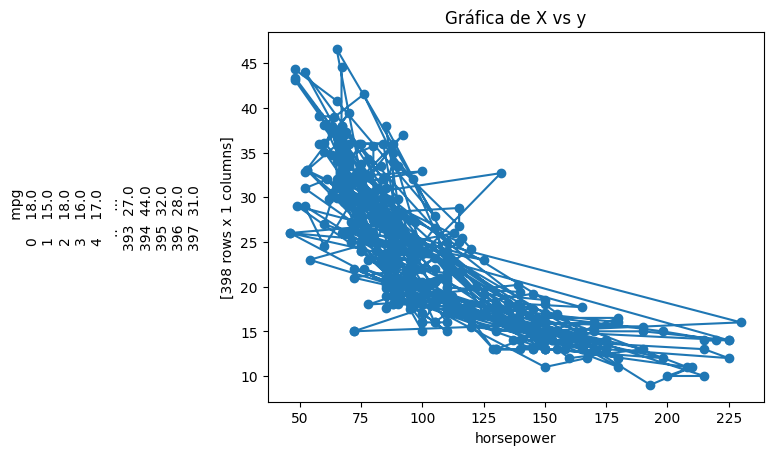

In [10]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    plt.plot(df, y, label = 'Relación X-Y', marker = 'o')
    plt.xlabel(nombre_columna)
    plt.ylabel(y)
    plt.title('Gráfica de X vs y')
   
    plt.show()
    

visualiza(X['horsepower'], y, 'horsepower')

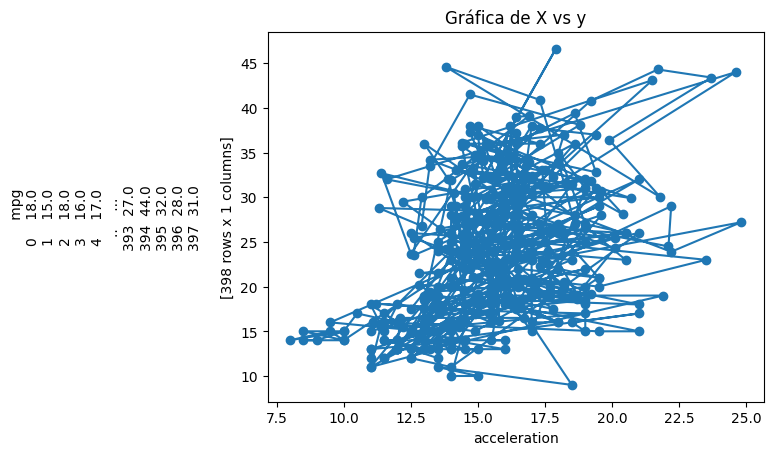

In [11]:
visualiza(X['acceleration'], y, 'acceleration')

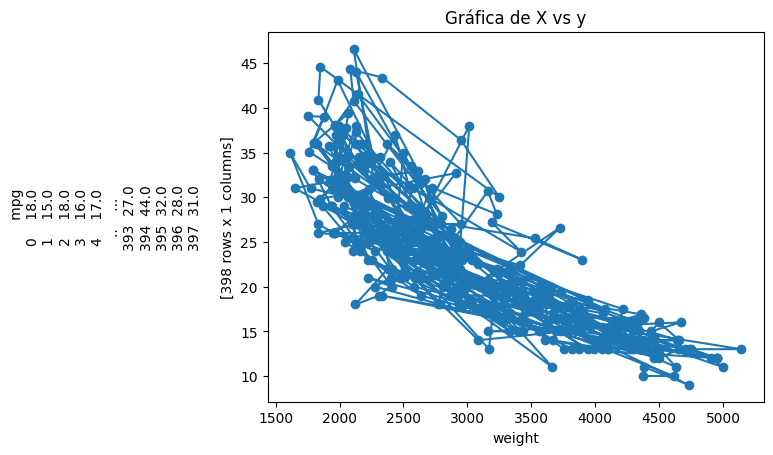

In [12]:
visualiza(X['weight'], y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [13]:
import numpy as np
from numpy.linalg import inv

def pesos_ols(X, y):
    
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    
    variables = len(X[0])
    observaciones = len(X)
    
               
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula
     
    if observaciones > variables: #No hay que trasponer. Caso normal
     
        ones = np.ones((X.shape[0], 1)) #Establece la columna de 1
        X_c = np.concatenate((ones, X), axis = 1) #Concatena la columna de 1 verticalmente
      

    else:
        #Hay que trasponer, es el caso raro

        XT = X.T
        ones = np.ones((XT.shape[0], 1)) #Establece la columna de 1
        X_c = np.concatenate((ones, XT), axis = 1) #Concatena la columna de 1 verticalmente
        
    
    # TODO 3 Calcula los pesos

    X_cT = X_c.T #Calcula la matriz traspuesta de X
    inversa = np.linalg.inv (X_cT @ X_c) #Cálculo de los pesos1
    W = inversa @ X_cT @ y #Cálculo de los pesos
    
    return W
    

In [14]:
# Array de prueba!!
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [15]:
import pandas as pd
import numpy as np

# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features 
y = auto_mpg.data.targets 

Weight = X['weight']

dX = pd.DataFrame(Weight)
dy = pd.DataFrame(y)

#Convertir el Dataframe a un array de Numpy
dX_array = dX.to_numpy()
dy_array = dy.to_numpy()

#Comprobaciones de los arrays
dimensionesX = dX_array.shape
dimensionesy = dy_array.shape

print("X: ", dimensionesX)
print("y: ", dimensionesy)

pesos_ols(dX_array, dy_array)



X:  (398, 1)
y:  (398, 1)


array([[ 4.63173644e+01],
       [-7.67661006e-03]])

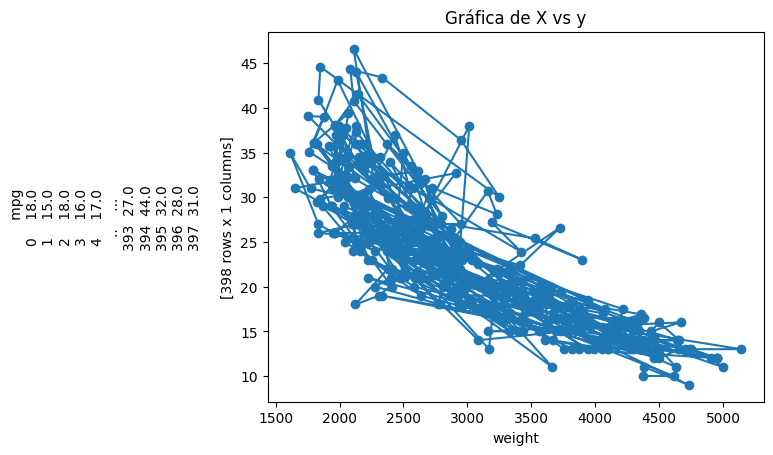

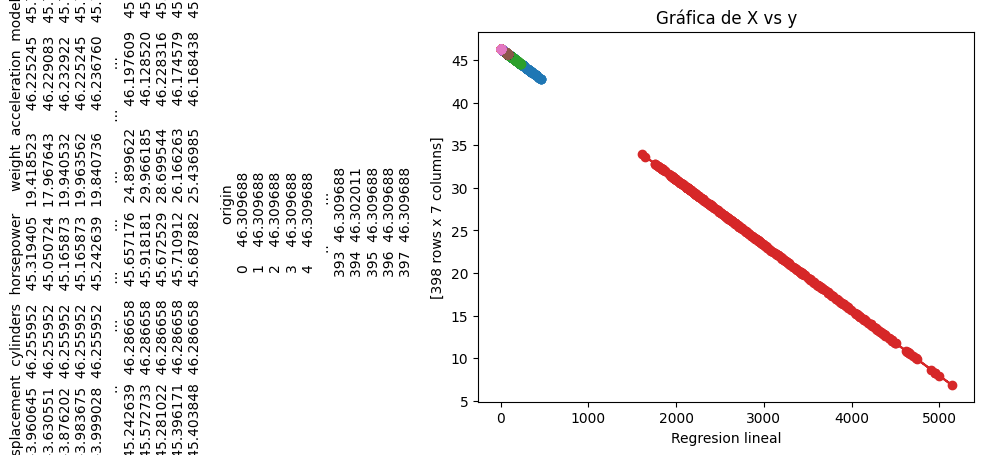

In [16]:
visualiza(dX_array, y, 'weight') #Graficar los valores reales

Y_predicho = 4.63173644e+01 - 7.67661006e-03 * X

visualiza (X, Y_predicho, 'Regresion lineal') #Graficar la línea de regresión lineal

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [17]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

El punto de corte es en 46.31, como la recta que sale pintada en la regresión lineal. Es decir, da el mismo resultado con el método de mínimos cuadrados que con el de scikit-learn.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



Una regresión lineal nos permite obtener la relación entre una o varias variables independientes (x) y una variable dependiente (y). En el plano, una regresión lineal se puede imaginar como una recta.  y = wo + x · w1
También existe una fórmula para dimensiones mayores;
y = wo + x1 · w1 + x2 · w2 + ... + xn · wn

El método de los mínimos cuadrados es una manera de obtener los coeficientes que caracterizan la regresión lineal. Se trata de minimizar las diferencias entre los valores predichos y los valores reales de la variable dependiente. El objetivo es minimizar el error cuadrático medio (MSE):
MSE = SUMA [yi - f(xi, w)]^2

De forma matricial, el vector que minimiza el error cuadrático medio tiene que cumplir la fórmula: W = (XT · X)^-1 · XT · y
Para resoverlo, se añade una columna de '1' a la matriz por la izquierda. Es necesario que la matriz cumpla que n > d, es decir, que el número de observaciones (filas del dataset) sea mayor que el número de características (columnas), para que el cálculo de la matriz inversa sea posible.

Por otro lado, el descenso del gradiente es otro método para hallar los coeficientes de una regresión lineal. En este caso, se trata de minimizar la función de coste paso a paso. Se empieza por una estimación inicial de los coeficientes y se ajustan gradualmente los valores en la dirección del gradiente (pendiente) de la función de coste. Hacia el sentido del mínimo de la función a pasos pequeños (step size o 'n').
x := x · n · Gradiente(f(x)) 

En el caso de una recta, el pendiente es wo y la intersección con el eje y es w1.
wo ^(t+1) = wo ^t - n &f / &wo

w1 ^(t+1) = w1 ^t - n &f / &w1











## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [18]:
import numpy as np


def predict(X, w):
    return np.dot(X, w)

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0 #Para inicializar la primera iteración
    
    
    # TODO 1 Añade la columna de 1s

    ones = np.ones((X.shape[0], 1)) #Establece la columna de 1
    X_c = np.concatenate((ones, X), axis = 1) #Concatena la columna de 1 verticalmente
    
    
    # TODO 2 Haz un bucle para las iteraciones 

    for i in range (n_iter):
        
        #Cálculo del gradiente para w0 y w1
        
        gradiente = np.dot(X_c.T, (predict(X_c, w)-y))

        #Actualizar los coeficientes

        w = w - eta * gradiente
        

    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
    
        loss_iter.append((1/2) * np.sum(y - predict(X_c, w)))
        w_iter.append(w)
        
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183845.82320222]
 [ 40415.66453324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

[[[   0.69646919]
  [   0.28613933]]

 [[  91.51252183]
  [ -26.69364927]]

 [[-179.11931504]
  [  53.70612077]]

 ...

 [[          nan]
  [          nan]]

 [[          nan]
  [          nan]]

 [[          nan]
  [          nan]]]


C:\Users\usuario\AppData\Local\Temp\ipykernel_19896\3869438542.py:32: RuntimeWarning: invalid value encountered in subtract
  w = w - eta * gradiente


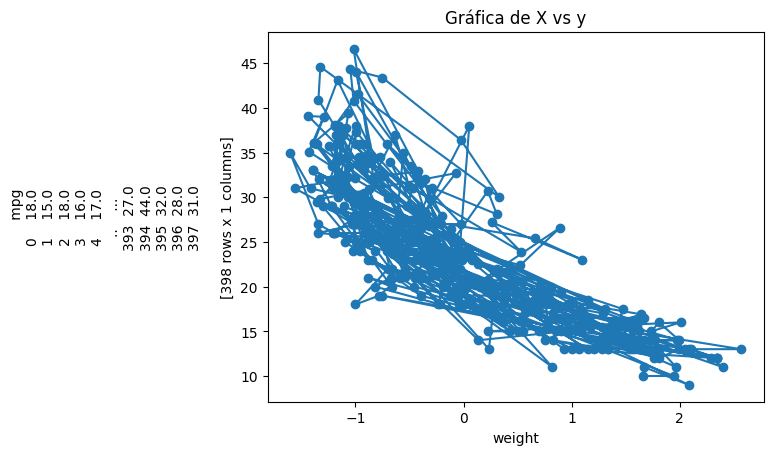

In [26]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate
eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

# TODO 2 Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)
print(weights)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
#visualiza(X_gd, np.dot(X_gd, weights), 'weight')
visualiza(X_gd, y, 'weight')
